# Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# TRENDS

In [2]:
# Reading the dataset.
df = pd.read_excel('store_return.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
set(df['Category'])

{'Furniture', 'Office Supplies', 'Technology'}

In [4]:
O = df.loc[df['Category'] == 'Office Supplies']

print(O['Order Date'].min())
O['Order Date'].max()

2014-01-03 00:00:00


Timestamp('2017-12-30 00:00:00')

In [5]:
O = O.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
O = O.set_index('Order Date')

O.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [7]:
Z = O['Sales'].resample('MS').mean()
#resample = Grouping
#ms= starting of month

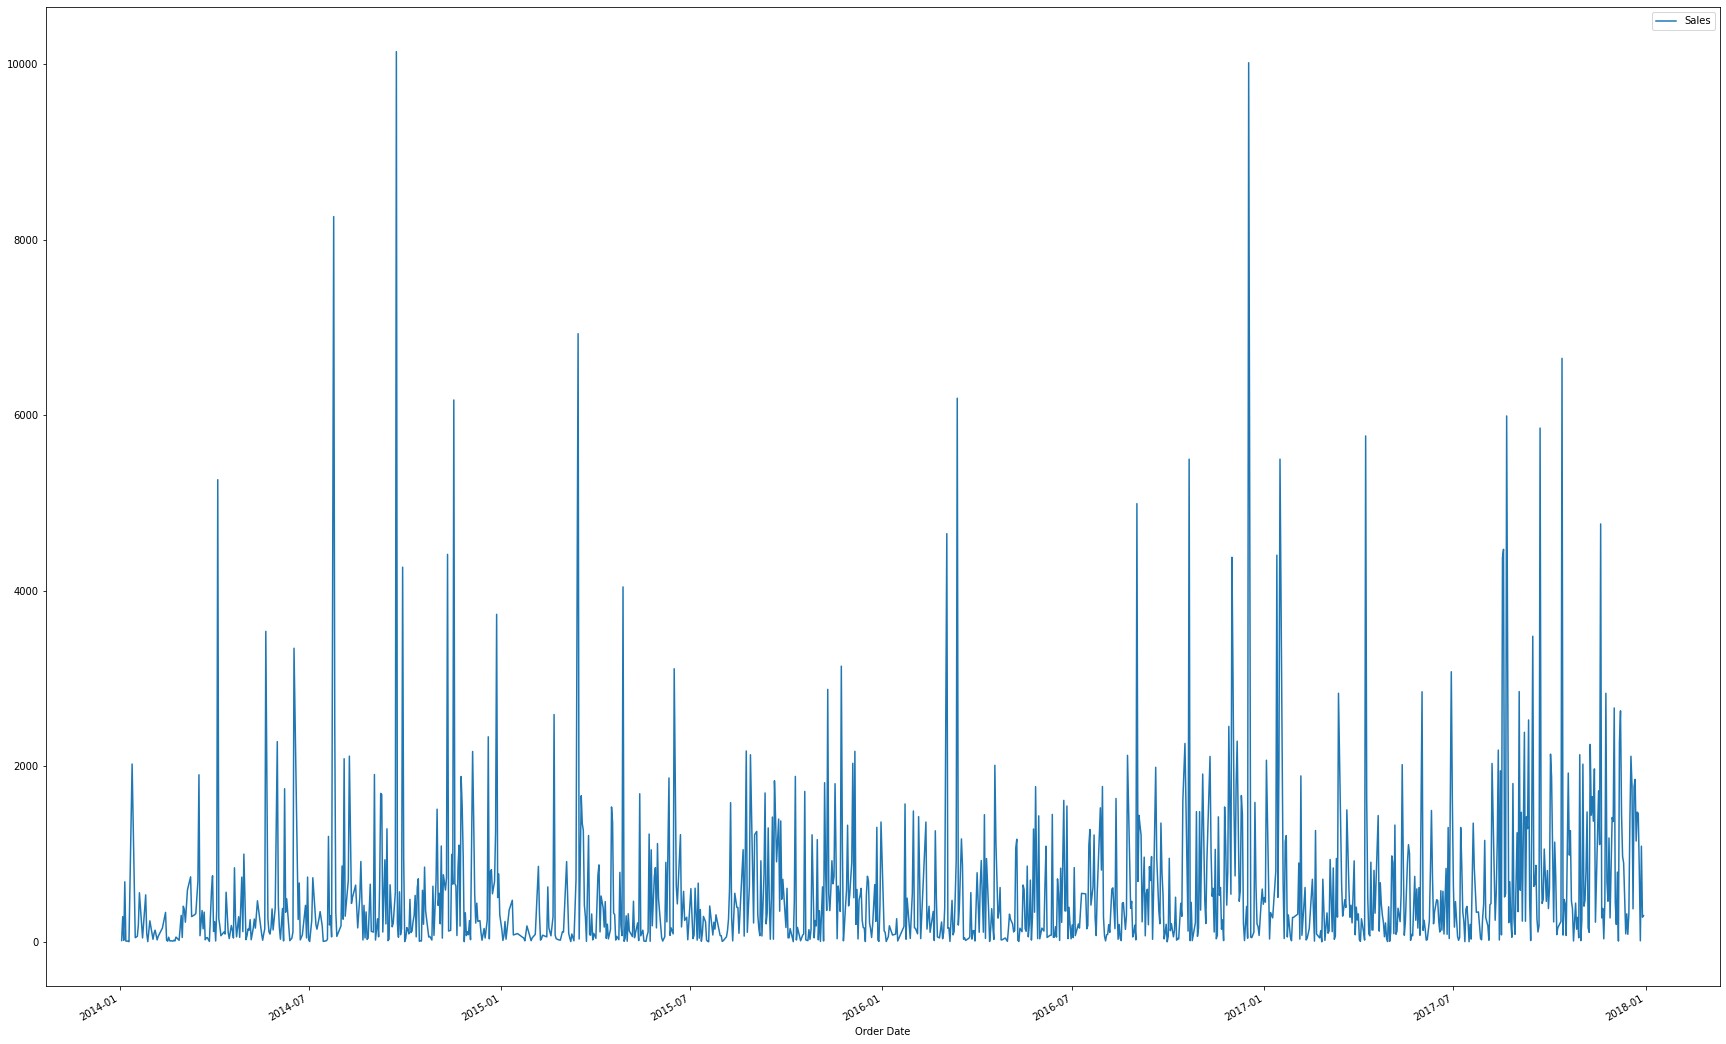

In [8]:
O.plot(figsize=(30, 20))

# --------------------------------------------------------------------------------------------------------

In [9]:
f = df.loc[df['Category'] == 'Furniture']

print(f['Order Date'].min())
f['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [10]:
f.sort_values('Order Date')
f.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
f = f.groupby('Order Date')['Sales'].sum().reset_index()

In [12]:
f = f.set_index('Order Date')

f.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
y = f['Sales'].resample('MS').mean()

In [14]:
y['2015':]

Order Date
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

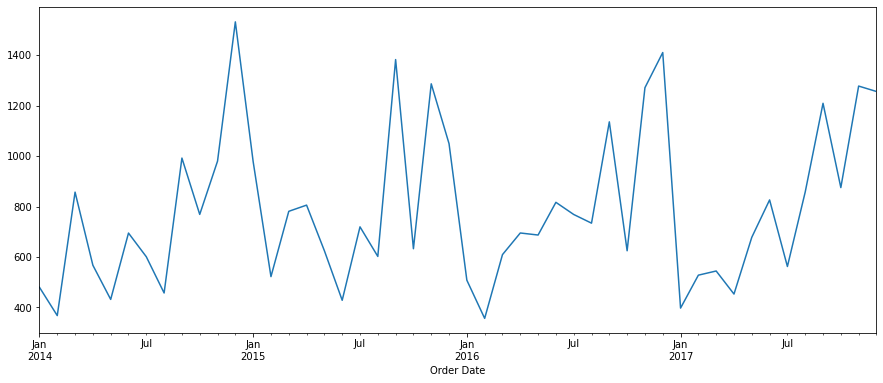

In [15]:
y.plot(figsize=(15, 6))

# ----------------------------------------------------------------------------------------------------------

In [16]:
T = df.loc[df['Category'] == 'Technology']

# This shows that we have time-series data of 4 years for furniture sales.
print(T['Order Date'].min())
T['Order Date'].max()

2014-01-06 00:00:00


Timestamp('2017-12-30 00:00:00')

In [17]:
T.sort_values('Order Date')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7478,7479,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,4,0.0,204.1092
7477,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742
593,594,CA-2014-135405,2014-01-09,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,...,78041,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.200,3,0.2,9.7500
765,766,CA-2014-162775,2014-01-13,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,...,71111,South,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,646.740,6,0.0,258.6960
1913,1914,CA-2014-103366,2014-01-15,2014-01-17,First Class,EH-13990,Erica Hackney,Consumer,United States,Roswell,...,30076,South,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,149.950,5,0.0,65.9780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4924,4925,CA-2017-114055,2017-12-25,2017-12-29,Second Class,MH-18115,Mick Hernandez,Home Office,United States,Huntsville,...,35810,South,TEC-PH-10002890,Technology,Phones,AT&T 17929 Lendline Telephone,90.480,2,0.0,23.5248
2569,2570,CA-2017-134404,2017-12-27,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,...,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
573,574,CA-2017-164826,2017-12-28,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,...,10024,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,3,0.0,4.0095
1878,1879,CA-2017-118885,2017-12-29,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,TEC-PH-10002563,Technology,Phones,Adtran 1202752G1,302.376,3,0.2,22.6782


In [18]:
T = T.groupby('Order Date')['Sales'].sum().reset_index()

In [19]:
T = T.set_index('Order Date')

T.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [20]:
w = T['Sales'].resample('MS').mean()

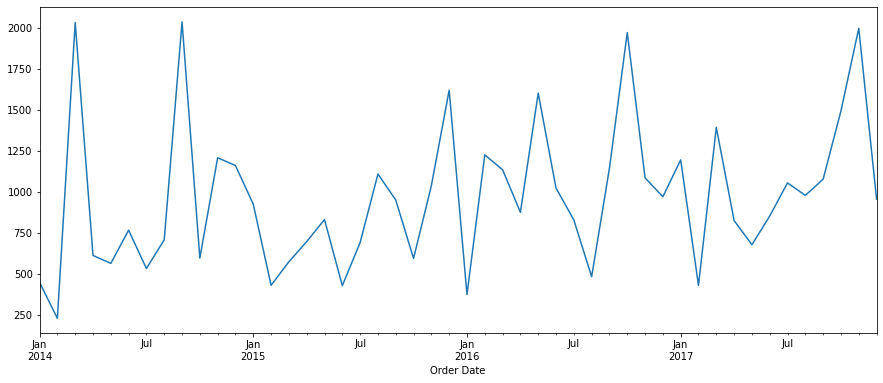

In [21]:
w.plot(figsize=(15, 6))

# Model Building

In [22]:
from pylab import rcParams
import statsmodels.api as sm

import itertools

In [23]:
rcParams['figure.figsize'] =20,10

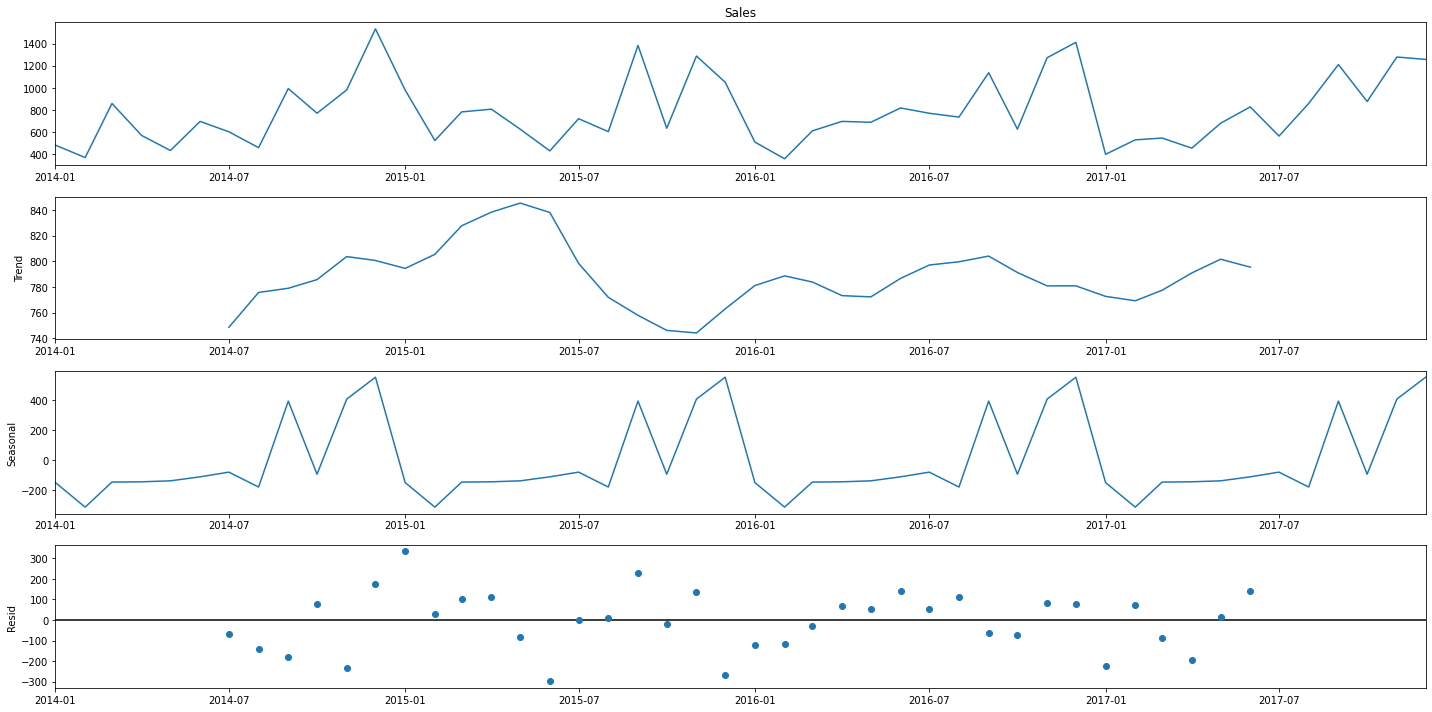

In [24]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [25]:
p=q=d=range(0,2)

In [26]:
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

In [27]:
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

## AIC Evaluation

In [28]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1576.7324642473277
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:302.2702899793649
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1478.1277236759956
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:304.24882803011644
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758104
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2786.7230874852653
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091505
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:291.6261389673295
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.59412606125284
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2768.427220528199
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.98848769468674
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:291.87255764352875
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1378.5486237111134
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:4

In [29]:
model = sm.tsa.statespace.SARIMAX(y,
                                  order = (0, 1, 1),
                                  seasonal_order = (0, 1, 1, 12),
                                  enforce_stationarity=False,
                                            enforce_invertibility=False)
                                  
                                 

In [30]:
results = model.fit()

In [31]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ma.L1,-1.0000,4058.437,-0.000,1.000,-7955.390,7953.390
ma.S.L12,-3.2470,1.667,-1.947,0.052,-6.515,0.021
sigma2,2368.6779,9.61e+06,0.000,1.000,-1.88e+07,1.88e+07


## Forecasting / Prediction

            lower Sales  upper Sales
Order Date                          
2014-01-01 -3394.757202  3394.757202
2014-02-01 -2293.254312  3253.642774
2014-03-01 -2407.022137  3143.150937
2014-04-01 -1918.373054  3631.800025
2014-05-01 -2207.256449  3342.916629
2014-06-01 -2342.876920  3207.296158
2014-07-01 -2080.337866  3469.835213
2014-08-01 -2173.806471  3376.366607
2014-09-01 -2317.395026  3232.778052
2014-10-01 -1783.364900  3766.808179
2014-11-01 -2005.807964  3544.365114
2014-12-01 -1795.114291  3755.058787
2015-01-01  -682.118830  4385.669258
2015-02-01 -1119.197344  2858.413774
2015-03-01   561.113226  1470.197286
2015-04-01   218.146155  1009.206056
2015-05-01   169.576335   916.295748
2015-06-01   461.686733  1185.045470
2015-07-01   297.205883  1006.122130
2015-08-01   172.954945   872.053056
2015-09-01   717.231954  1409.219878
2015-10-01   541.226635  1227.827000
2015-11-01   725.750311  1408.127002
2015-12-01  1294.509618  1973.420206
2016-01-01   694.671456  1370.870193
2

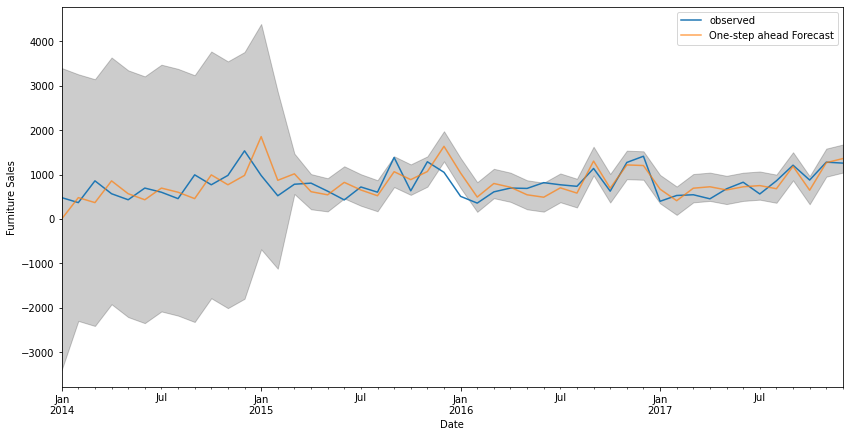

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [33]:
y_predicted = pred.predicted_mean
y_true = y['2017-01-01':]
mse = ((y_predicted - y_true)**2).mean()
print('Mean Square Error is:', round(mse, 4))

Mean Square Error is: 27090.4755


In [34]:
print('Root Mean Square Error is:', np.sqrt(mse))

Root Mean Square Error is: 164.59184509866503


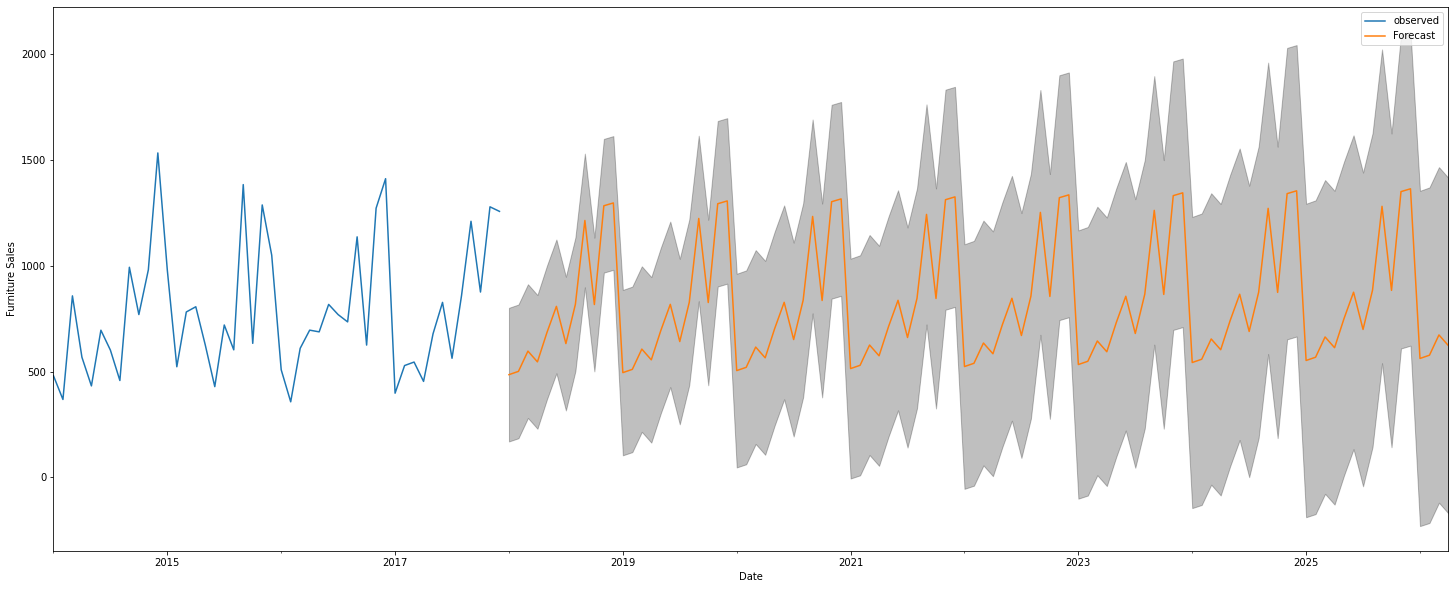

In [35]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(25, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

#we are forecasting monthvise from 1st day from everymonth